In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/PRML-2020/Data\ Contest

/content/drive/My Drive/PRML-2020/Data Contest


In [10]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import pickle as pkl

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Dataset prep


In [15]:
train_df = pd.read_csv('./Required data/train_complete.csv').fillna(0)
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)
display(train_df)

,biker_id,tour_id,invited,timestamp,like,dislike,tour_date,latitude,longitude,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,w31,...,area_Tel Aviv Israel,area_Temecula California,area_Termo De La Spezia Liguria Italy,area_The Plains Ohio,area_Toluca 15,area_Torino 12,area_Toronto ON,area_Toronto Ohio,area_Toyama-shi Toyama Japan,area_Tracy California,area_Tripoli 61,area_Tripoli Libya,area_Tuban Jawa Timur Indonesia,area_Turbenthal Switzerland,area_Ubon Rachatani Ubon Ratchathani Thailand,area_Union City CA,area_Varanassi Uttar Pradesh India,area_Varginha Brazil,area_Vieux Grand Port Grand Port Mauritius,area_Villa De Laguna Salada Valverde Dominican Republic,area_Villa Mella Dominican Republic,area_Vung Tau 45,area_Washington Heights New York,area_Weifang,area_Westchester New York,area_Whitby Ontario,area_Wolcott Connecticut,area_Wonogiri Jawa Tengah Indonesia,area_Woodland CA,area_Yerevan Armenia,area_Yio Chu Kang Singapore,area_Yokosuka-shi Kanagawa Japan,area_Zarqa' Az Zarqa Jordan,area_Zurich 25,area_`Arab Jizan Saudi Arabia,area_undefined undefined,num_friends_going,num_friends_not_going,num_friends_maybe,num_friends_invited
0,DA44012,QY18771225,0,1.738369e+14,0,0,20121003,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3
1,DA44012,QU02284248,0,1.738369e+14,0,0,20121003,-7.767,110.363,2,0,0,0,2,3,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,DA44012,RU29072432,0,1.738369e+14,1,0,20121026,3.567,98.650,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,DA44012,SP72478280,0,1.738369e+14,0,0,20121006,34.017,71.583,1,2,1,1,0,0,2,0,0,1,1,1,2,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,DA44012,QS90707377,0,1.738369e+14,0,0,20121006,3.607,98.653,2,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13861,EC93103086,RW50873665,0,1.738369e+14,0,0,20121208,-6.973,107.633,1,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13862,EC93103086,TP84655790,0,1.738369e+14,0,0,20121209,0.000,0.000,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
13863,EC93103086,UY8708806,0,1.738369e+14,0,0,20121209,-7.973,112.609,3,2,0,1,1,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3
13864,EC93103086,VP4179853,0,1.738369e+14,0,0,20121212,-8.167,113.700,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [16]:
y_like = train_df['like']
y_dislike = train_df['dislike']
y = np.array(y_like - y_dislike)
X = (train_df.drop(['tour_id', 'biker_id', 'like', 'dislike'], axis=1)).to_numpy()
X.shape, y.shape

((13866, 517), (13866,))

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((11092, 517), (2774, 517), (11092,), (2774,))

# Feature importance analysis

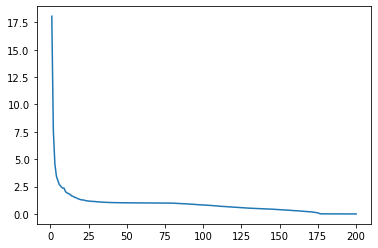

In [7]:
X_train_scld = StandardScaler().fit_transform(X_train)
S = np.cov(X_train_scld.T)
eigval = np.linalg.eigvals(S)
eigval[::-1].sort()

plt.plot(range(1, 201), eigval[:200])
plt.show()

In [28]:
pca = PCA(n_components=175)
X_train_pca = pca.fit_transform(X_train_scld)
X_val_pca = pca.transform(X_val_scld)
X_train_pca.shape, X_val_pca.shape

((11092, 175), (2774, 175))

# Train model

## SVC - rbf

Kernal : rbf, gamma : 0.001, C : 1.0
Training accuracy : 0.725, Validation accuracy : 0.739
Validation F1 score : 0.321


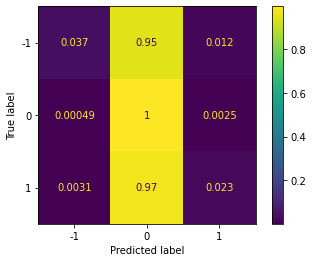

Kernal : rbf, gamma : 0.001, C : 10.0
Training accuracy : 0.763, Validation accuracy : 0.743
Validation F1 score : 0.372


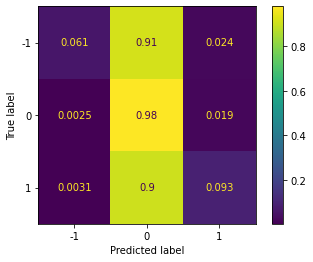

Kernal : rbf, gamma : 0.001, C : 100.0
Training accuracy : 0.816, Validation accuracy : 0.727
Validation F1 score : 0.416


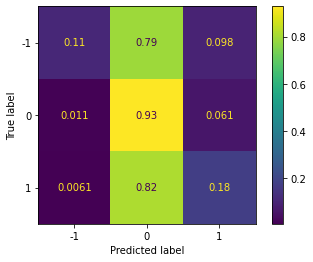

Kernal : rbf, gamma : 0.001, C : 1000.0
Training accuracy : 0.857, Validation accuracy : 0.703
Validation F1 score : 0.435


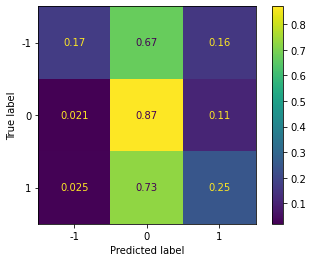

Kernal : rbf, gamma : 0.001, C : 10000.0
Training accuracy : 0.891, Validation accuracy : 0.669
Validation F1 score : 0.415


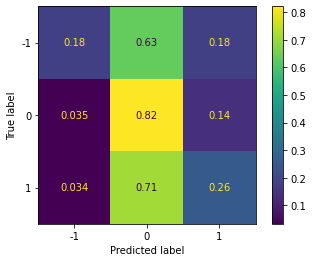

Kernal : rbf, gamma : 0.01, C : 1.0
Training accuracy : 0.782, Validation accuracy : 0.751
Validation F1 score : 0.354


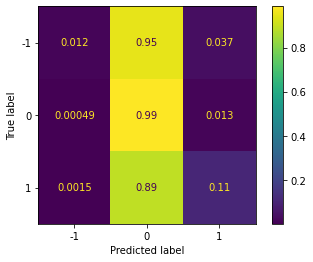

Kernal : rbf, gamma : 0.01, C : 10.0
Training accuracy : 0.857, Validation accuracy : 0.744
Validation F1 score : 0.414


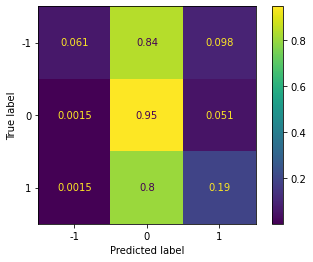

Kernal : rbf, gamma : 0.01, C : 100.0
Training accuracy : 0.897, Validation accuracy : 0.709
Validation F1 score : 0.441


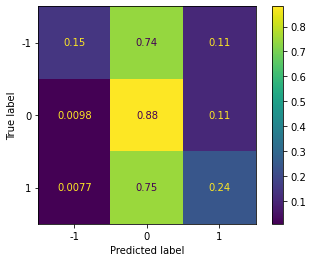

Kernal : rbf, gamma : 0.01, C : 1000.0
Training accuracy : 0.923, Validation accuracy : 0.683
Validation F1 score : 0.428


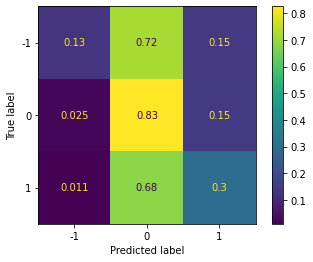

Kernal : rbf, gamma : 0.01, C : 10000.0
Training accuracy : 0.940, Validation accuracy : 0.666
Validation F1 score : 0.415


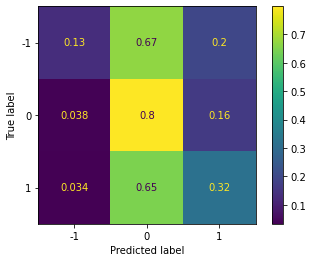

Kernal : rbf, gamma : 0.1, C : 1.0
Training accuracy : 0.874, Validation accuracy : 0.752
Validation F1 score : 0.373


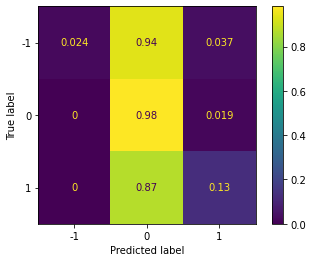

Kernal : rbf, gamma : 0.1, C : 10.0
Training accuracy : 0.922, Validation accuracy : 0.735
Validation F1 score : 0.413


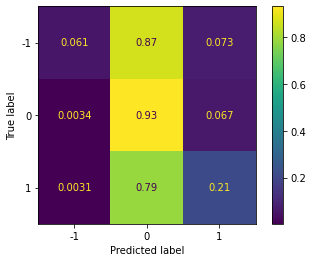

Kernal : rbf, gamma : 0.1, C : 100.0
Training accuracy : 0.946, Validation accuracy : 0.721
Validation F1 score : 0.407


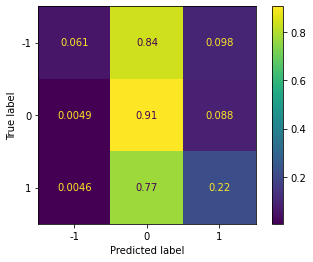

Kernal : rbf, gamma : 0.1, C : 1000.0
Training accuracy : 0.962, Validation accuracy : 0.704
Validation F1 score : 0.397


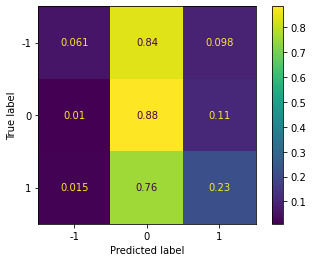

Kernal : rbf, gamma : 0.1, C : 10000.0
Training accuracy : 0.975, Validation accuracy : 0.691
Validation F1 score : 0.397


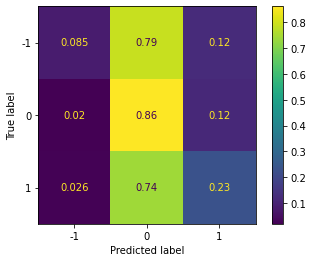

Kernal : rbf, gamma : 1.0, C : 1.0
Training accuracy : 0.930, Validation accuracy : 0.742
Validation F1 score : 0.347


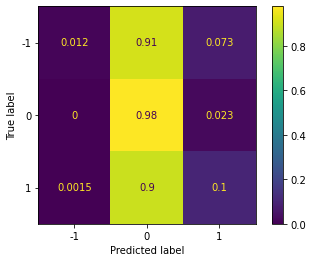

Kernal : rbf, gamma : 1.0, C : 10.0
Training accuracy : 0.959, Validation accuracy : 0.736
Validation F1 score : 0.370


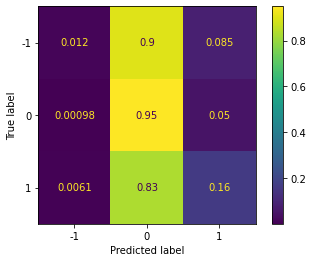

Kernal : rbf, gamma : 1.0, C : 100.0
Training accuracy : 0.973, Validation accuracy : 0.722
Validation F1 score : 0.367


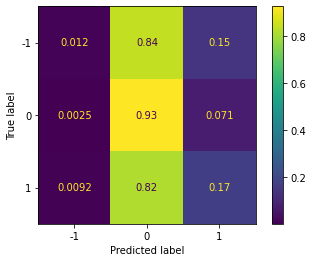

Kernal : rbf, gamma : 1.0, C : 1000.0
Training accuracy : 0.986, Validation accuracy : 0.711
Validation F1 score : 0.364


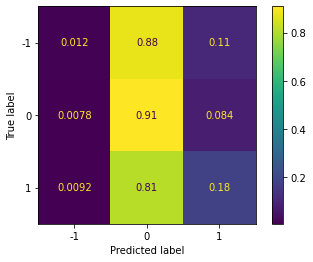

Kernal : rbf, gamma : 1.0, C : 10000.0
Training accuracy : 0.994, Validation accuracy : 0.705
Validation F1 score : 0.368


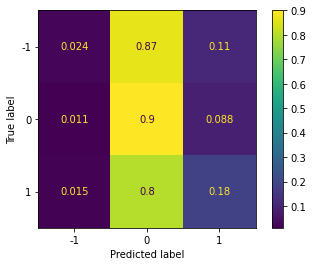

Kernal : rbf, gamma : 10.0, C : 1.0
Training accuracy : 0.960, Validation accuracy : 0.737
Validation F1 score : 0.317


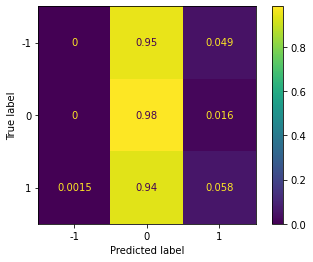

Kernal : rbf, gamma : 10.0, C : 10.0
Training accuracy : 0.979, Validation accuracy : 0.729
Validation F1 score : 0.336


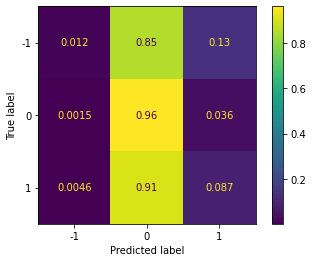

Kernal : rbf, gamma : 10.0, C : 100.0
Training accuracy : 0.992, Validation accuracy : 0.724
Validation F1 score : 0.346


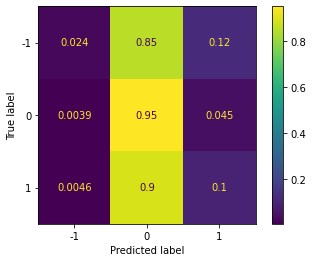

Kernal : rbf, gamma : 10.0, C : 1000.0
Training accuracy : 0.996, Validation accuracy : 0.722
Validation F1 score : 0.345


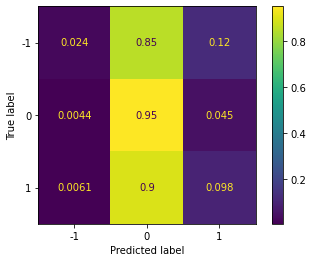

Kernal : rbf, gamma : 10.0, C : 10000.0
Training accuracy : 0.999, Validation accuracy : 0.722
Validation F1 score : 0.344


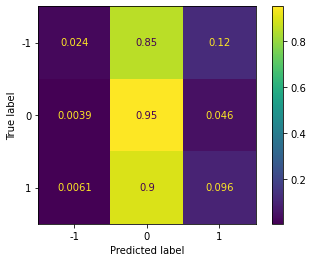

Kernal : rbf, gamma : 100.0, C : 1.0
Training accuracy : 0.979, Validation accuracy : 0.732
Validation F1 score : 0.298


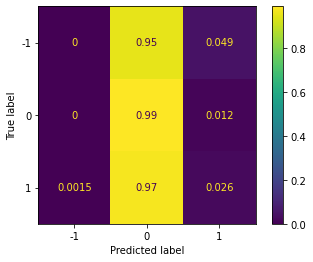

Kernal : rbf, gamma : 100.0, C : 10.0
Training accuracy : 0.994, Validation accuracy : 0.729
Validation F1 score : 0.311


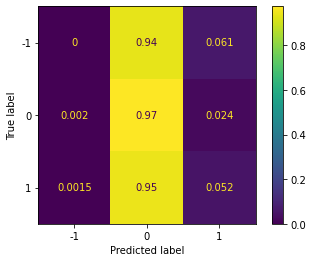

Kernal : rbf, gamma : 100.0, C : 100.0
Training accuracy : 0.999, Validation accuracy : 0.726
Validation F1 score : 0.311


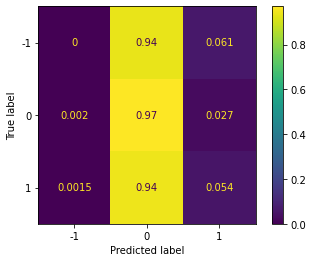

Kernal : rbf, gamma : 100.0, C : 1000.0
Training accuracy : 0.999, Validation accuracy : 0.725
Validation F1 score : 0.311


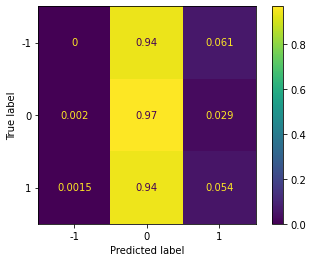

Kernal : rbf, gamma : 100.0, C : 10000.0
Training accuracy : 1.000, Validation accuracy : 0.725
Validation F1 score : 0.311


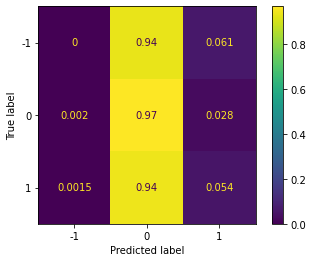

Kernal : rbf, gamma : 1000.0, C : 1.0
Training accuracy : 0.994, Validation accuracy : 0.734
Validation F1 score : 0.287


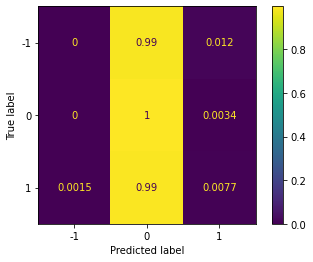

Kernal : rbf, gamma : 1000.0, C : 10.0
Training accuracy : 0.999, Validation accuracy : 0.733
Validation F1 score : 0.298


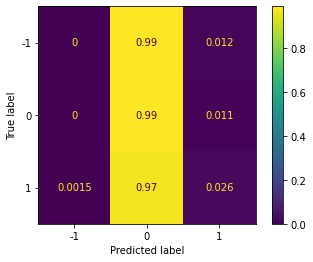

Kernal : rbf, gamma : 1000.0, C : 100.0
Training accuracy : 1.000, Validation accuracy : 0.734
Validation F1 score : 0.298


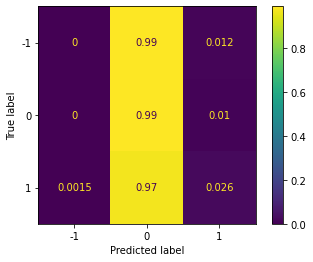

Kernal : rbf, gamma : 1000.0, C : 1000.0
Training accuracy : 1.000, Validation accuracy : 0.734
Validation F1 score : 0.298


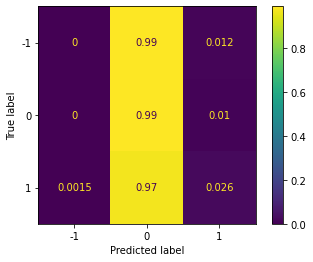

Kernal : rbf, gamma : 1000.0, C : 10000.0
Training accuracy : 1.000, Validation accuracy : 0.734
Validation F1 score : 0.298


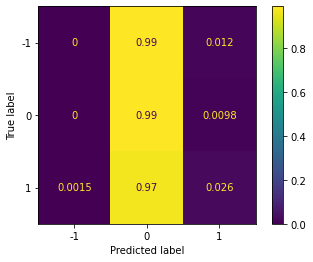

In [19]:
F1_score = []
params = {}
for gamma in tqdm(np.power(10, np.linspace(-3, 3, 7))):
    for C in np.power(10, np.linspace(0, 4, 5)):
        
        print('===================================================================================')
        print('Kernal : rbf, gamma : {1}, C : {0}'.format(C, gamma))
        model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=C, gamma=gamma))
        model.fit(X_train_pca, y_train)

        y_train_pred = model.predict(X_train_pca)
        y_val_pred = model.predict(X_val_pca)

        tacc = accuracy_score(y_train, y_train_pred)
        vacc = accuracy_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred, average='macro')
        print('Training accuracy : {0:.3f}, Validation accuracy : {1:.3f}'.format(tacc, vacc))
        print("Validation F1 score : {0:.3f}".format(val_f1))

        conf_matrix = confusion_matrix(y_val, y_val_pred, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
        disp.plot()
        plt.show()

        F1_score.append(val_f1)
        params[str(val_f1)] = [gamma, C]

In [20]:
params[str(max(F1_score))], max(F1_score)

([0.01, 100.0], 0.44139409593311685)

## SVC - sigmoid

Kernal : sigmoid, gamma : 0.001, C : 1.0
Training accuracy : 0.719, Validation accuracy : 0.735
Validation F1 score : 0.305


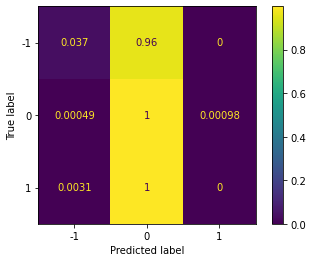

Kernal : sigmoid, gamma : 0.001, C : 10.0
Training accuracy : 0.705, Validation accuracy : 0.730
Validation F1 score : 0.310


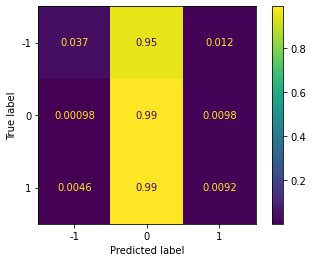

Kernal : sigmoid, gamma : 0.001, C : 100.0
Training accuracy : 0.673, Validation accuracy : 0.711
Validation F1 score : 0.325


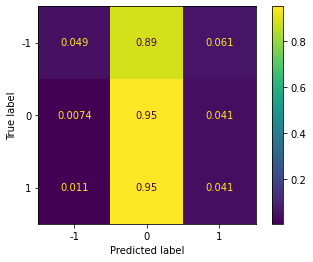

Kernal : sigmoid, gamma : 0.001, C : 1000.0
Training accuracy : 0.618, Validation accuracy : 0.643
Validation F1 score : 0.356


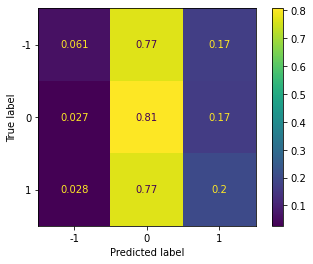

Kernal : sigmoid, gamma : 0.001, C : 10000.0
Training accuracy : 0.590, Validation accuracy : 0.602
Validation F1 score : 0.353


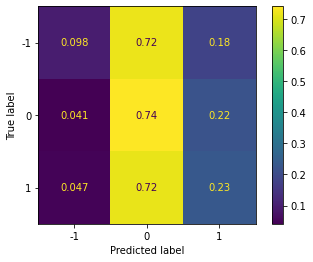

Kernal : sigmoid, gamma : 0.01, C : 1.0
Training accuracy : 0.628, Validation accuracy : 0.668
Validation F1 score : 0.334


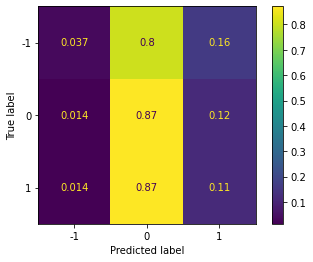

Kernal : sigmoid, gamma : 0.01, C : 10.0
Training accuracy : 0.575, Validation accuracy : 0.606
Validation F1 score : 0.351


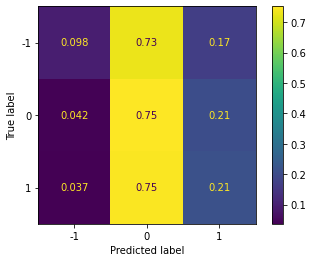

Kernal : sigmoid, gamma : 0.01, C : 100.0
Training accuracy : 0.577, Validation accuracy : 0.590
Validation F1 score : 0.343


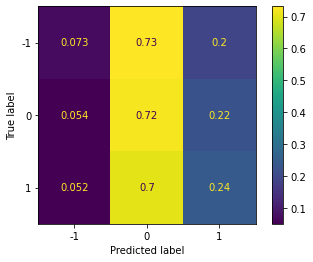

Kernal : sigmoid, gamma : 0.01, C : 1000.0
Training accuracy : 0.575, Validation accuracy : 0.598
Validation F1 score : 0.352


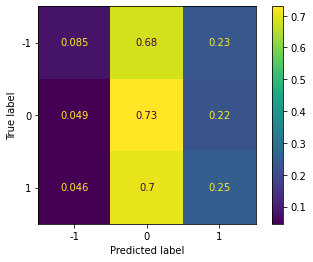

Kernal : sigmoid, gamma : 0.01, C : 10000.0
Training accuracy : 0.573, Validation accuracy : 0.590
Validation F1 score : 0.350


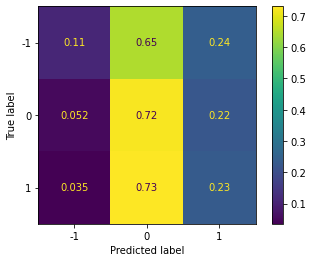

Kernal : sigmoid, gamma : 0.1, C : 1.0
Training accuracy : 0.556, Validation accuracy : 0.573
Validation F1 score : 0.315


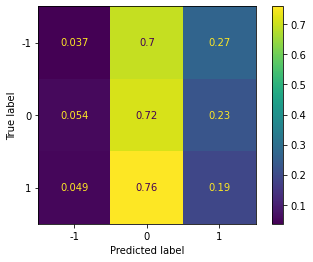

Kernal : sigmoid, gamma : 0.1, C : 10.0
Training accuracy : 0.559, Validation accuracy : 0.571
Validation F1 score : 0.310


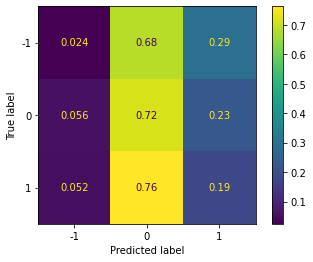

Kernal : sigmoid, gamma : 0.1, C : 100.0
Training accuracy : 0.561, Validation accuracy : 0.578
Validation F1 score : 0.313


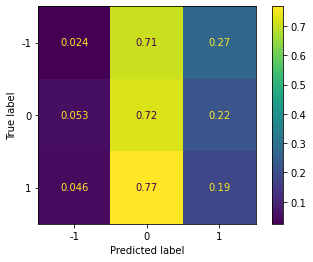

Kernal : sigmoid, gamma : 0.1, C : 1000.0
Training accuracy : 0.564, Validation accuracy : 0.578
Validation F1 score : 0.321


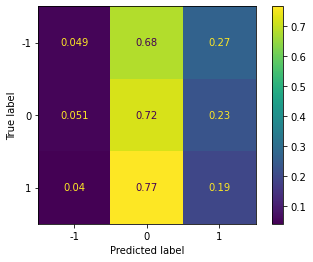

Kernal : sigmoid, gamma : 0.1, C : 10000.0
Training accuracy : 0.562, Validation accuracy : 0.576
Validation F1 score : 0.322


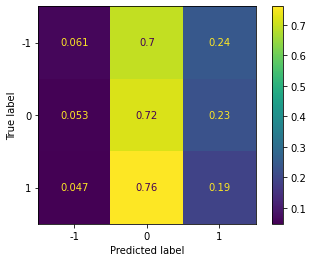

Kernal : sigmoid, gamma : 1.0, C : 1.0
Training accuracy : 0.565, Validation accuracy : 0.575
Validation F1 score : 0.327


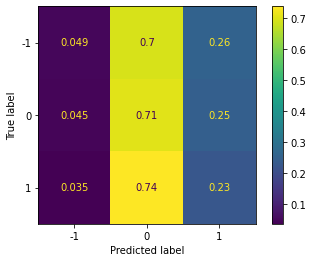

Kernal : sigmoid, gamma : 1.0, C : 10.0
Training accuracy : 0.565, Validation accuracy : 0.579
Validation F1 score : 0.332


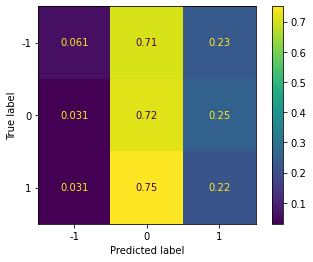

Kernal : sigmoid, gamma : 1.0, C : 100.0
Training accuracy : 0.559, Validation accuracy : 0.572
Validation F1 score : 0.324


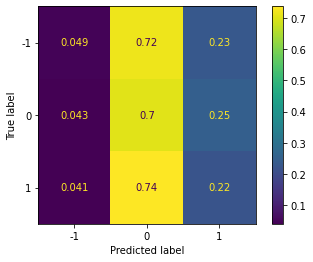

Kernal : sigmoid, gamma : 1.0, C : 1000.0
Training accuracy : 0.559, Validation accuracy : 0.570
Validation F1 score : 0.324


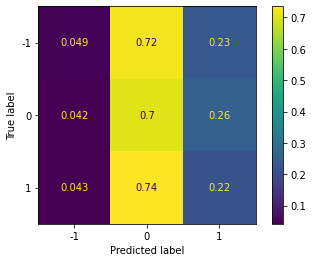

Kernal : sigmoid, gamma : 1.0, C : 10000.0
Training accuracy : 0.558, Validation accuracy : 0.571
Validation F1 score : 0.324


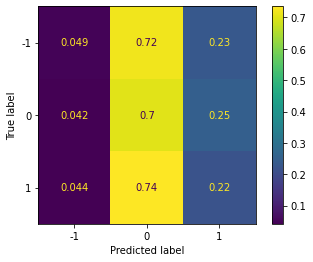

Kernal : sigmoid, gamma : 10.0, C : 1.0
Training accuracy : 0.554, Validation accuracy : 0.563
Validation F1 score : 0.315


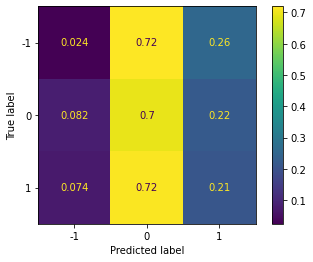

Kernal : sigmoid, gamma : 10.0, C : 10.0
Training accuracy : 0.553, Validation accuracy : 0.564
Validation F1 score : 0.315


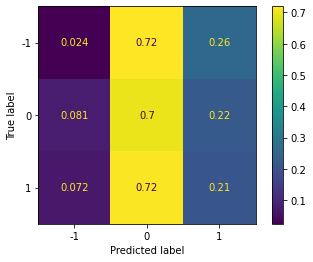

Kernal : sigmoid, gamma : 10.0, C : 100.0
Training accuracy : 0.554, Validation accuracy : 0.563
Validation F1 score : 0.317


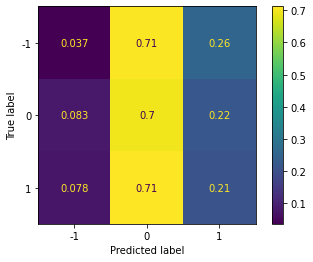

Kernal : sigmoid, gamma : 10.0, C : 1000.0
Training accuracy : 0.554, Validation accuracy : 0.563
Validation F1 score : 0.317


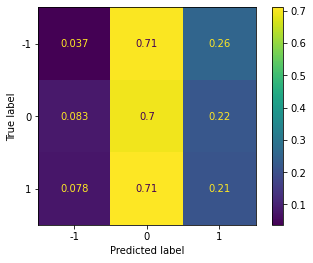

Kernal : sigmoid, gamma : 10.0, C : 10000.0
Training accuracy : 0.554, Validation accuracy : 0.563
Validation F1 score : 0.317


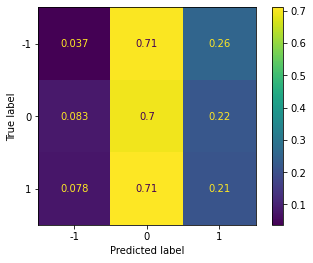

Kernal : sigmoid, gamma : 100.0, C : 1.0
Training accuracy : 0.556, Validation accuracy : 0.565
Validation F1 score : 0.321


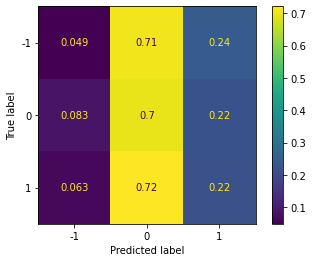

Kernal : sigmoid, gamma : 100.0, C : 10.0
Training accuracy : 0.556, Validation accuracy : 0.565
Validation F1 score : 0.321


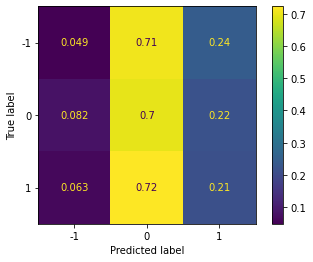

Kernal : sigmoid, gamma : 100.0, C : 100.0
Training accuracy : 0.556, Validation accuracy : 0.566
Validation F1 score : 0.321


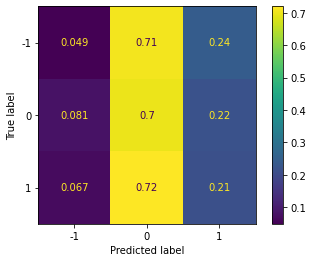

Kernal : sigmoid, gamma : 100.0, C : 1000.0
Training accuracy : 0.557, Validation accuracy : 0.562
Validation F1 score : 0.320


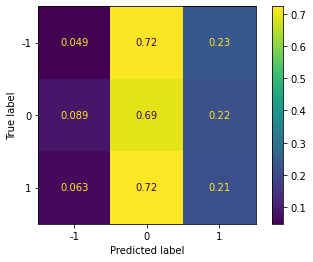

Kernal : sigmoid, gamma : 100.0, C : 10000.0
Training accuracy : 0.557, Validation accuracy : 0.562
Validation F1 score : 0.320


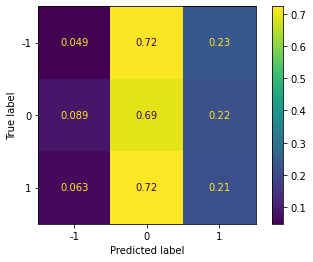

Kernal : sigmoid, gamma : 1000.0, C : 1.0
Training accuracy : 0.564, Validation accuracy : 0.566
Validation F1 score : 0.317


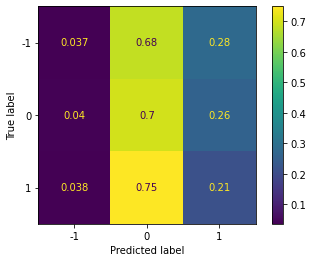

Kernal : sigmoid, gamma : 1000.0, C : 10.0
Training accuracy : 0.564, Validation accuracy : 0.567
Validation F1 score : 0.318


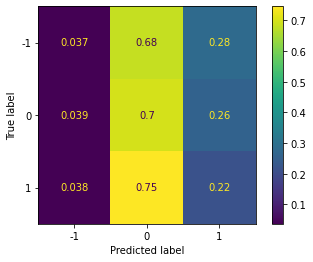

Kernal : sigmoid, gamma : 1000.0, C : 100.0
Training accuracy : 0.563, Validation accuracy : 0.568
Validation F1 score : 0.319


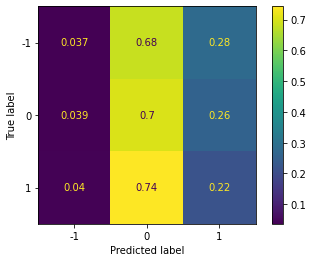

Kernal : sigmoid, gamma : 1000.0, C : 1000.0
Training accuracy : 0.563, Validation accuracy : 0.565
Validation F1 score : 0.318


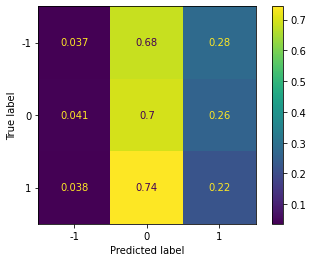

Kernal : sigmoid, gamma : 1000.0, C : 10000.0
Training accuracy : 0.565, Validation accuracy : 0.567
Validation F1 score : 0.317


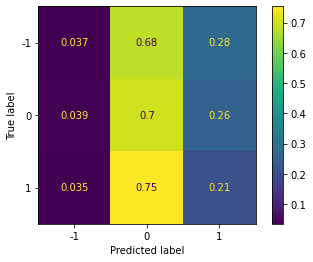

In [17]:
F1_score = []
params = {}
for gamma in tqdm(np.power(10, np.linspace(-3, 3, 7))):
    for C in np.power(10, np.linspace(0, 4, 5)):
        
        print('===================================================================================')
        print('Kernal : sigmoid, gamma : {1}, C : {0}'.format(C, gamma))
        model = make_pipeline(StandardScaler(), SVC(kernel='sigmoid', C=C, gamma=gamma))
        model.fit(X_train_pca, y_train)

        y_train_pred = model.predict(X_train_pca)
        y_val_pred = model.predict(X_val_pca)

        tacc = accuracy_score(y_train, y_train_pred)
        vacc = accuracy_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred, average='macro')
        print('Training accuracy : {0:.3f}, Validation accuracy : {1:.3f}'.format(tacc, vacc))
        print("Validation F1 score : {0:.3f}".format(val_f1))

        conf_matrix = confusion_matrix(y_val, y_val_pred, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
        disp.plot()
        plt.show()

        F1_score.append(val_f1)
        params[str(val_f1)] = [gamma, C]

In [18]:
params[str(max(F1_score))], max(F1_score)

([0.001, 1000.0], 0.3563653319090732)

## KNN

Weights : uniform, k : 3
Training accuracy : 0.813, Validation accuracy : 0.686
Validation F1 score : 0.419


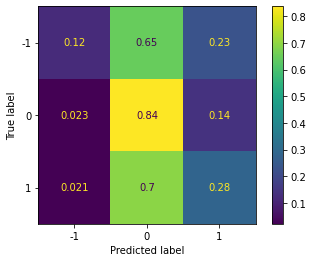

Weights : distance, k : 3
Training accuracy : 1.000, Validation accuracy : 0.691
Validation F1 score : 0.430


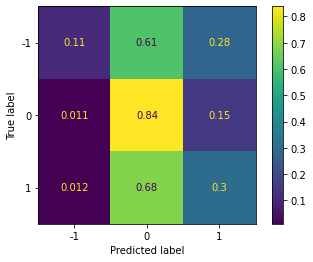

Weights : uniform, k : 5
Training accuracy : 0.774, Validation accuracy : 0.716
Validation F1 score : 0.435


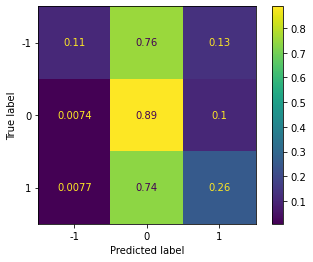

Weights : distance, k : 5
Training accuracy : 1.000, Validation accuracy : 0.707
Validation F1 score : 0.445


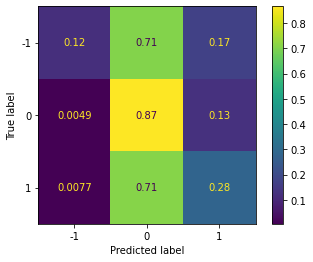

Weights : uniform, k : 7
Training accuracy : 0.763, Validation accuracy : 0.726
Validation F1 score : 0.428


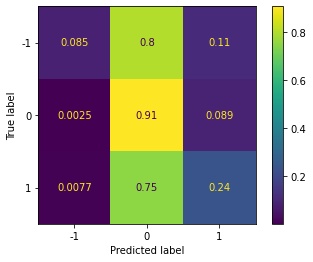

Weights : distance, k : 7
Training accuracy : 1.000, Validation accuracy : 0.720
Validation F1 score : 0.453


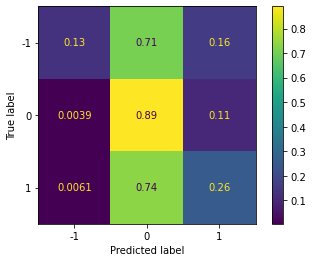

Weights : uniform, k : 9
Training accuracy : 0.751, Validation accuracy : 0.734
Validation F1 score : 0.404


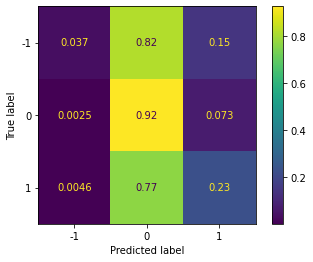

Weights : distance, k : 9
Training accuracy : 1.000, Validation accuracy : 0.729
Validation F1 score : 0.428


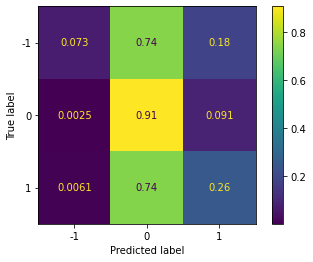

Weights : uniform, k : 11
Training accuracy : 0.747, Validation accuracy : 0.739
Validation F1 score : 0.397


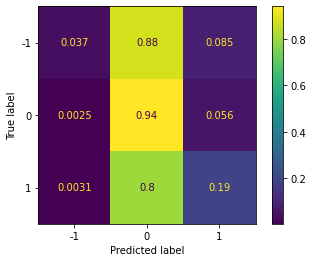

Weights : distance, k : 11
Training accuracy : 1.000, Validation accuracy : 0.732
Validation F1 score : 0.424


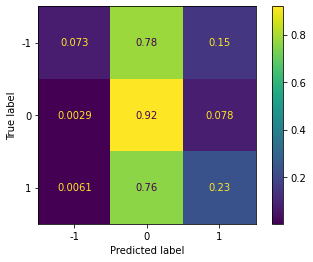

Weights : uniform, k : 13
Training accuracy : 0.744, Validation accuracy : 0.745
Validation F1 score : 0.394


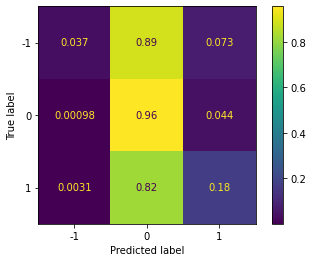

Weights : distance, k : 13
Training accuracy : 1.000, Validation accuracy : 0.734
Validation F1 score : 0.419


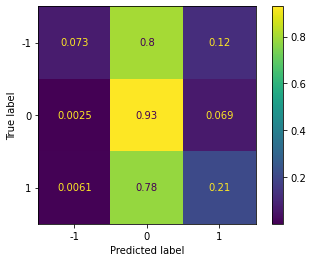

Weights : uniform, k : 15
Training accuracy : 0.741, Validation accuracy : 0.750
Validation F1 score : 0.398


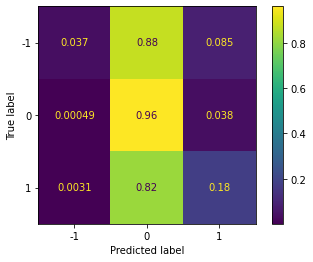

Weights : distance, k : 15
Training accuracy : 1.000, Validation accuracy : 0.743
Validation F1 score : 0.424


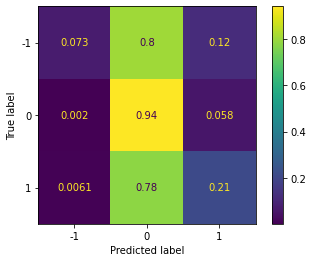

Weights : uniform, k : 17
Training accuracy : 0.738, Validation accuracy : 0.749
Validation F1 score : 0.392


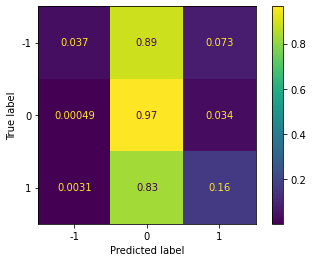

Weights : distance, k : 17
Training accuracy : 1.000, Validation accuracy : 0.744
Validation F1 score : 0.423


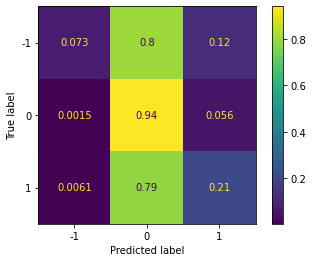

Weights : uniform, k : 19
Training accuracy : 0.735, Validation accuracy : 0.748
Validation F1 score : 0.385


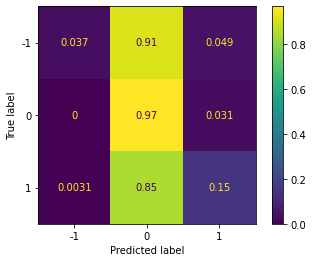

Weights : distance, k : 19
Training accuracy : 1.000, Validation accuracy : 0.744
Validation F1 score : 0.415


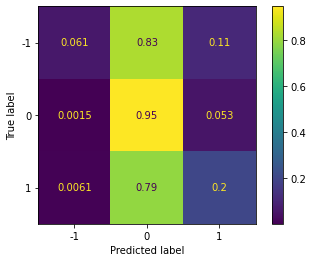

Weights : uniform, k : 21
Training accuracy : 0.734, Validation accuracy : 0.750
Validation F1 score : 0.374


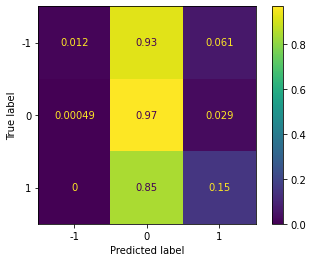

Weights : distance, k : 21
Training accuracy : 1.000, Validation accuracy : 0.746
Validation F1 score : 0.414


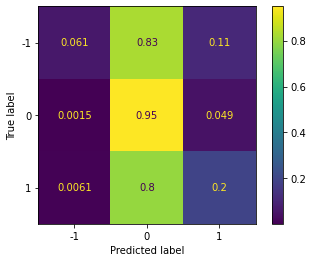

Weights : uniform, k : 23
Training accuracy : 0.733, Validation accuracy : 0.748
Validation F1 score : 0.367


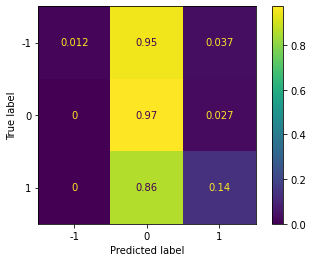

Weights : distance, k : 23
Training accuracy : 1.000, Validation accuracy : 0.747
Validation F1 score : 0.407


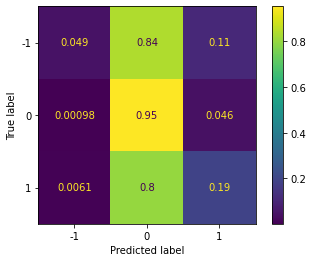

Weights : uniform, k : 25
Training accuracy : 0.733, Validation accuracy : 0.747
Validation F1 score : 0.357


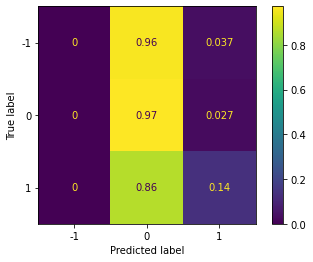

Weights : distance, k : 25
Training accuracy : 1.000, Validation accuracy : 0.746
Validation F1 score : 0.398


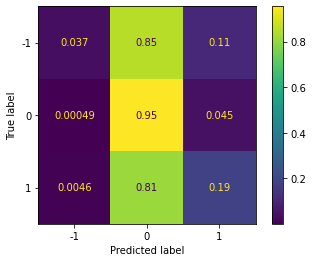

In [11]:
F1_score = []
params = {}
for k in tqdm(np.linspace(3, 25, 12, dtype=np.int32)):
    for weights in ['uniform', 'distance']:
        
        print('===================================================================================')
        print('Weights : {0}, k : {1}'.format(weights, k))
        model = make_pipeline(StandardScaler(), KNeighborsClassifier(weights=weights, n_neighbors=k))
        model.fit(X_train_pca, y_train)

        y_train_pred = model.predict(X_train_pca)
        y_val_pred = model.predict(X_val_pca)

        tacc = accuracy_score(y_train, y_train_pred)
        vacc = accuracy_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred, average='macro')
        print('Training accuracy : {0:.3f}, Validation accuracy : {1:.3f}'.format(tacc, vacc))
        print("Validation F1 score : {0:.3f}".format(val_f1))

        conf_matrix = confusion_matrix(y_val, y_val_pred, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
        disp.plot()
        plt.show()

        F1_score.append(val_f1)
        params[str(val_f1)] = [weights, k]

In [12]:
params[str(max(F1_score))], max(F1_score)

(['distance', 7], 0.45273281085709954)

## Logistic Regression

Penalty : l1, C : 0.001
Training accuracy : 0.722, Validation accuracy : 0.725
Validation F1 score : 0.280


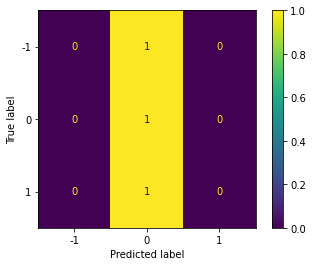

Penalty : l2, C : 0.001
Training accuracy : 0.726, Validation accuracy : 0.725
Validation F1 score : 0.297


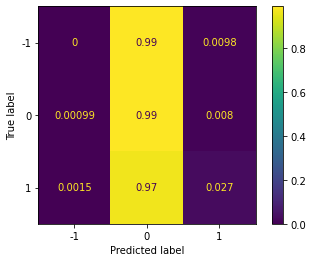

Penalty : none, C : 0.001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


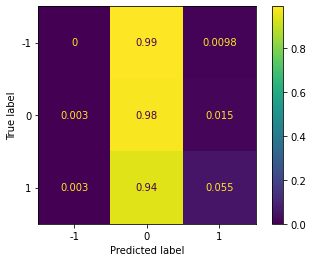

Penalty : l1, C : 0.01
Training accuracy : 0.724, Validation accuracy : 0.729
Validation F1 score : 0.295


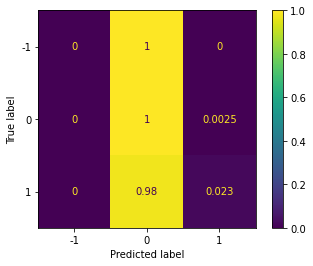

Penalty : l2, C : 0.01
Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.307


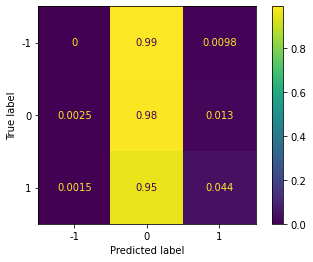

Penalty : none, C : 0.01


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


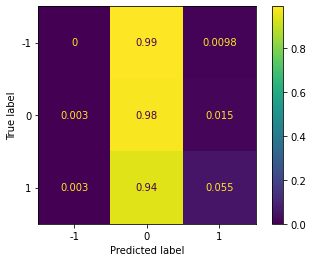

Penalty : l1, C : 0.1
Training accuracy : 0.725, Validation accuracy : 0.723
Validation F1 score : 0.300


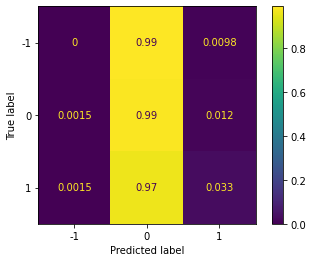

Penalty : l2, C : 0.1
Training accuracy : 0.727, Validation accuracy : 0.724
Validation F1 score : 0.311


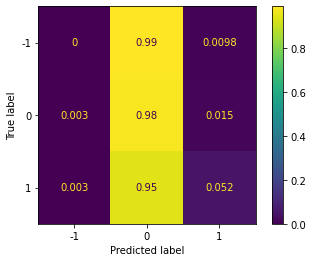

Penalty : none, C : 0.1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


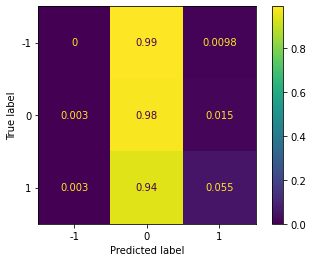

Penalty : l1, C : 1.0
Training accuracy : 0.725, Validation accuracy : 0.724
Validation F1 score : 0.305


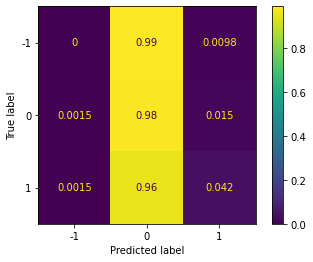

Penalty : l2, C : 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


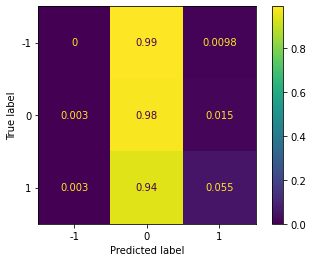

Penalty : none, C : 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


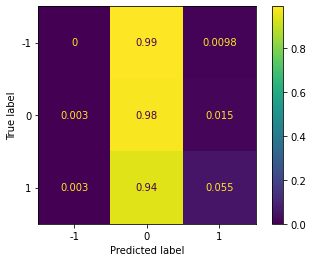

Penalty : l1, C : 10.0
Training accuracy : 0.726, Validation accuracy : 0.723
Validation F1 score : 0.306


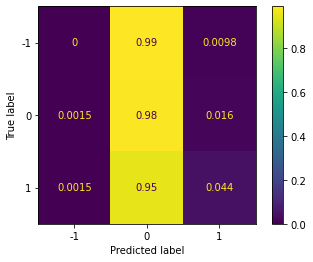

Penalty : l2, C : 10.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


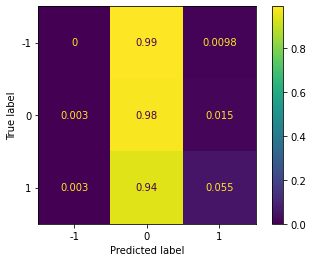

Penalty : none, C : 10.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


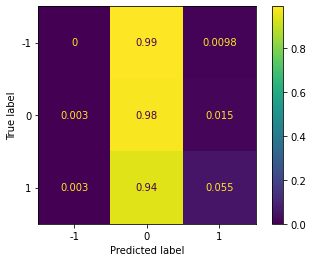

Penalty : l1, C : 100.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy : 0.726, Validation accuracy : 0.724
Validation F1 score : 0.307


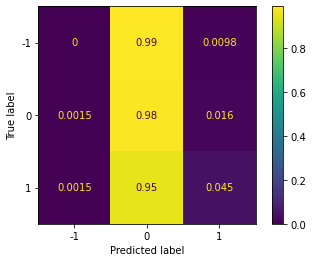

Penalty : l2, C : 100.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


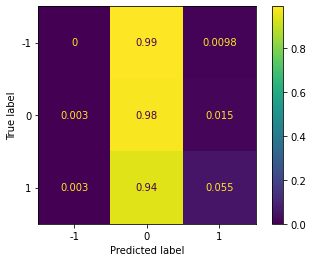

Penalty : none, C : 100.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


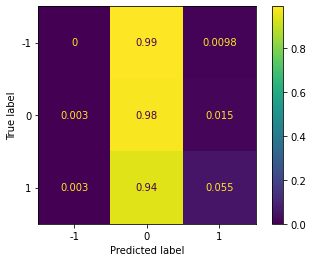

Penalty : l1, C : 1000.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy : 0.726, Validation accuracy : 0.724
Validation F1 score : 0.307


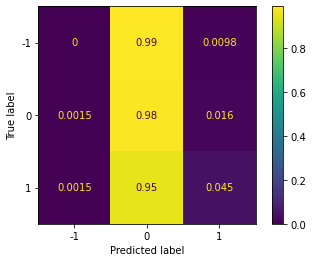

Penalty : l2, C : 1000.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


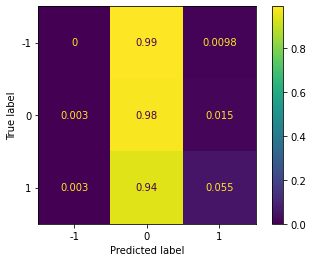

Penalty : none, C : 1000.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.727, Validation accuracy : 0.725
Validation F1 score : 0.313


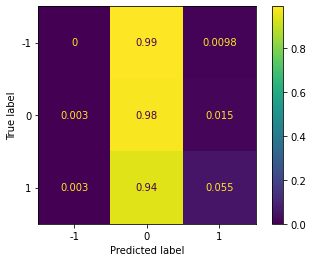

In [31]:
F1_score = []
params = {}
for C in tqdm(np.power(10, np.linspace(-3, 3, 7))):
    for penalty in ['l1', 'l2', 'none']:
        
        print('===================================================================================')
        print('Penalty : {0}, C : {1}'.format(penalty, C))
        if penalty=='l1':
            model = make_pipeline(StandardScaler(), LogisticRegression(penalty=penalty, C=C, solver='liblinear'))
        else:
            model = make_pipeline(StandardScaler(), LogisticRegression(penalty=penalty, C=C, solver='lbfgs'))
        model.fit(X_train_pca, y_train)

        y_train_pred = model.predict(X_train_pca)
        y_val_pred = model.predict(X_val_pca)

        tacc = accuracy_score(y_train, y_train_pred)
        vacc = accuracy_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred, average='macro')
        print('Training accuracy : {0:.3f}, Validation accuracy : {1:.3f}'.format(tacc, vacc))
        print("Validation F1 score : {0:.3f}".format(val_f1))

        conf_matrix = confusion_matrix(y_val, y_val_pred, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
        disp.plot()
        plt.show()

        F1_score.append(val_f1)
        params[str(val_f1)] = [penalty, C]

In [32]:
params[str(max(F1_score))], max(F1_score)

(['none', 1000.0], 0.3125140959535864)

## Decision Tree

Criterion : gini, min samples leaf : 1
Training accuracy : 1.000, Validation accuracy : 0.611
Validation F1 score : 0.366


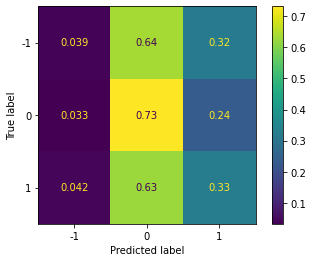

Criterion : entropy, min samples leaf : 1
Training accuracy : 1.000, Validation accuracy : 0.622
Validation F1 score : 0.401


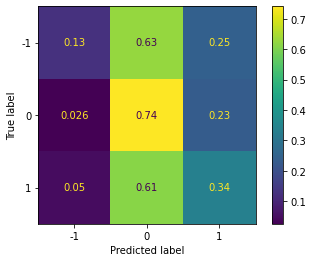

Criterion : gini, min samples leaf : 3
Training accuracy : 0.937, Validation accuracy : 0.621
Validation F1 score : 0.387


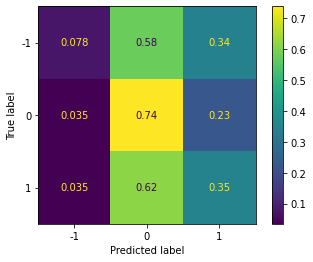

Criterion : entropy, min samples leaf : 3
Training accuracy : 0.966, Validation accuracy : 0.623
Validation F1 score : 0.397


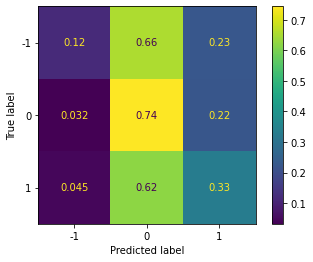

Criterion : gini, min samples leaf : 5
Training accuracy : 0.899, Validation accuracy : 0.631
Validation F1 score : 0.376


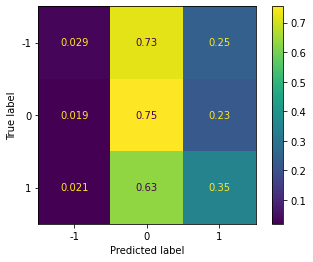

Criterion : entropy, min samples leaf : 5
Training accuracy : 0.928, Validation accuracy : 0.630
Validation F1 score : 0.401


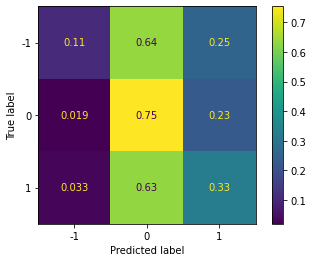

Criterion : gini, min samples leaf : 7
Training accuracy : 0.872, Validation accuracy : 0.629
Validation F1 score : 0.373


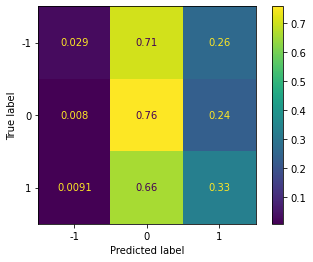

Criterion : entropy, min samples leaf : 7
Training accuracy : 0.898, Validation accuracy : 0.634
Validation F1 score : 0.383


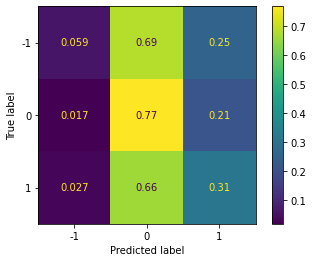

Criterion : gini, min samples leaf : 9
Training accuracy : 0.851, Validation accuracy : 0.636
Validation F1 score : 0.372


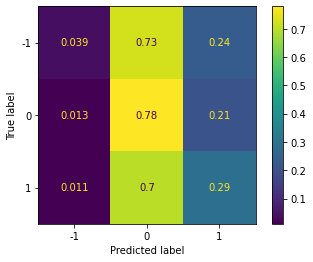

Criterion : entropy, min samples leaf : 9
Training accuracy : 0.870, Validation accuracy : 0.646
Validation F1 score : 0.407


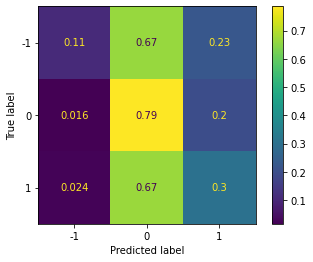

Criterion : gini, min samples leaf : 11
Training accuracy : 0.837, Validation accuracy : 0.651
Validation F1 score : 0.362


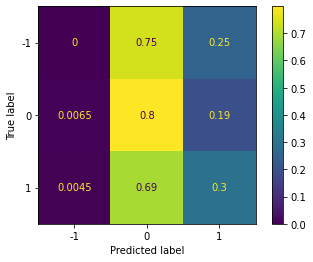

Criterion : entropy, min samples leaf : 11
Training accuracy : 0.851, Validation accuracy : 0.642
Validation F1 score : 0.393


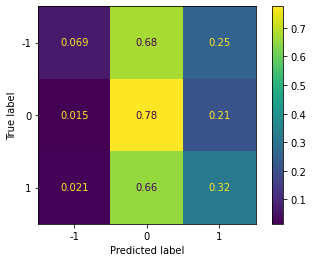

Criterion : gini, min samples leaf : 13
Training accuracy : 0.824, Validation accuracy : 0.658
Validation F1 score : 0.383


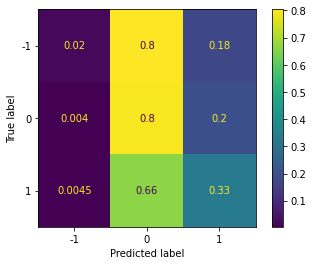

Criterion : entropy, min samples leaf : 13
Training accuracy : 0.836, Validation accuracy : 0.644
Validation F1 score : 0.388


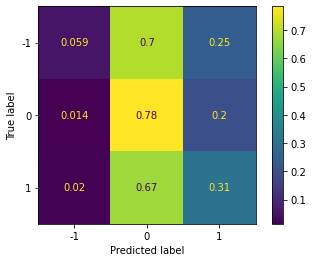

Criterion : gini, min samples leaf : 15
Training accuracy : 0.814, Validation accuracy : 0.668
Validation F1 score : 0.371


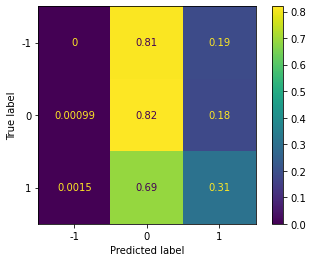

Criterion : entropy, min samples leaf : 15
Training accuracy : 0.823, Validation accuracy : 0.640
Validation F1 score : 0.379


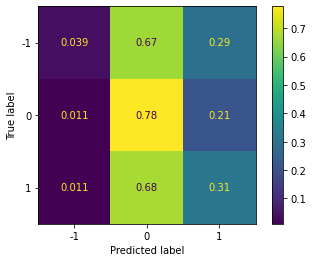

Criterion : gini, min samples leaf : 17
Training accuracy : 0.809, Validation accuracy : 0.663
Validation F1 score : 0.364


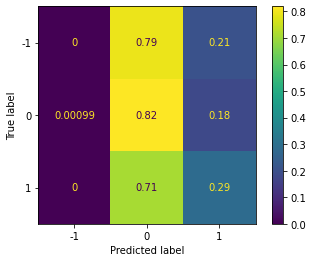

Criterion : entropy, min samples leaf : 17
Training accuracy : 0.811, Validation accuracy : 0.662
Validation F1 score : 0.396


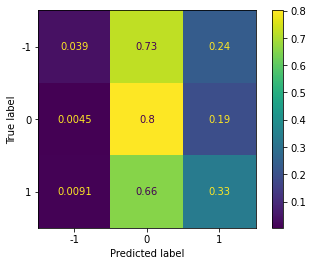

Criterion : gini, min samples leaf : 19
Training accuracy : 0.803, Validation accuracy : 0.658
Validation F1 score : 0.363


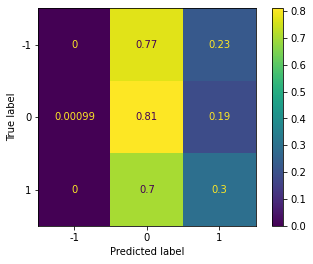

Criterion : entropy, min samples leaf : 19
Training accuracy : 0.801, Validation accuracy : 0.667
Validation F1 score : 0.386


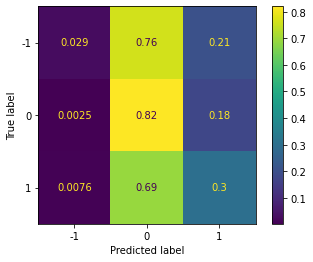

Criterion : gini, min samples leaf : 21
Training accuracy : 0.795, Validation accuracy : 0.661
Validation F1 score : 0.363


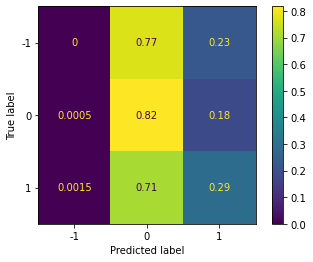

Criterion : entropy, min samples leaf : 21
Training accuracy : 0.796, Validation accuracy : 0.663
Validation F1 score : 0.375


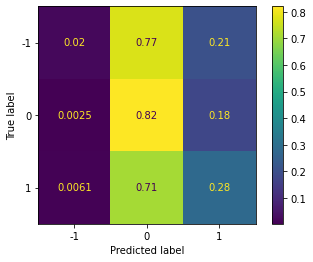

Criterion : gini, min samples leaf : 23
Training accuracy : 0.790, Validation accuracy : 0.673
Validation F1 score : 0.372


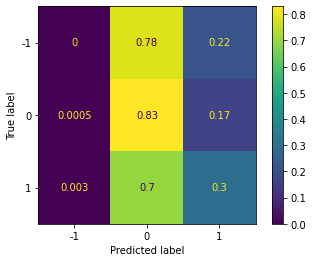

Criterion : entropy, min samples leaf : 23
Training accuracy : 0.788, Validation accuracy : 0.667
Validation F1 score : 0.385


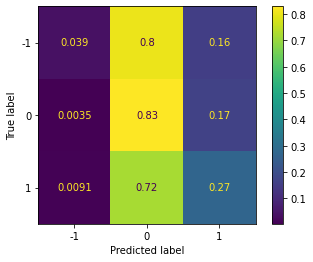

Criterion : gini, min samples leaf : 25
Training accuracy : 0.782, Validation accuracy : 0.678
Validation F1 score : 0.374


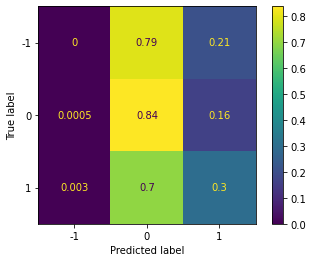

Criterion : entropy, min samples leaf : 25
Training accuracy : 0.783, Validation accuracy : 0.670
Validation F1 score : 0.383


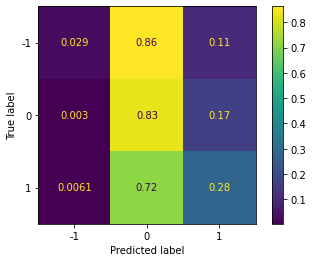

In [29]:
F1_score = []
params = {}
for min_samples_leaf in tqdm(np.linspace(1, 25, 13, dtype=np.int32)):
    for criterion in ['gini', 'entropy']:
        
        print('===================================================================================')
        print('Criterion : {0}, min samples leaf : {1}'.format(criterion, min_samples_leaf))
        model = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion=criterion, 
                                                                       min_samples_leaf=min_samples_leaf))
        model.fit(X_train_pca, y_train)

        y_train_pred = model.predict(X_train_pca)
        y_val_pred = model.predict(X_val_pca)

        tacc = accuracy_score(y_train, y_train_pred)
        vacc = accuracy_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred, average='macro')
        print('Training accuracy : {0:.3f}, Validation accuracy : {1:.3f}'.format(tacc, vacc))
        print("Validation F1 score : {0:.3f}".format(val_f1))

        conf_matrix = confusion_matrix(y_val, y_val_pred, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
        disp.plot()
        plt.show()

        F1_score.append(val_f1)
        params[str(val_f1)] = [criterion, min_samples_leaf]

In [30]:
params[str(max(F1_score))], max(F1_score)

(['entropy', 9], 0.4066142827649428)

## Random Forest Classifier

Num estimators : 50, min samples leaf : 1, max features : 0.5, max samples : 0.5
Training accuracy : 0.940, Validation accuracy : 0.726
Validation F1 score : 0.375


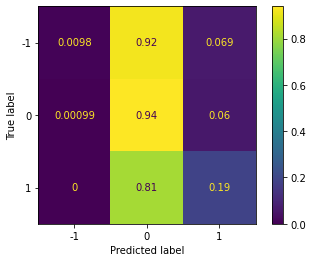

Num estimators : 50, min samples leaf : 1, max features : 0.5, max samples : 0.6
Training accuracy : 0.970, Validation accuracy : 0.722
Validation F1 score : 0.381


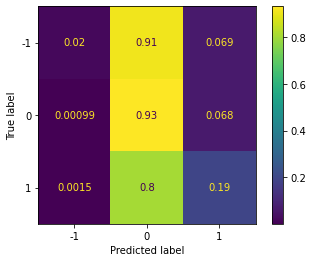

Num estimators : 50, min samples leaf : 1, max features : 0.5, max samples : 0.7
Training accuracy : 0.987, Validation accuracy : 0.726
Validation F1 score : 0.382


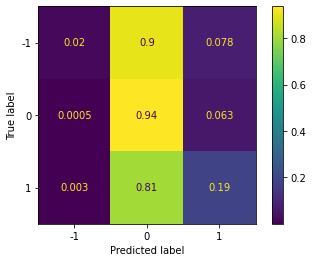

Num estimators : 50, min samples leaf : 1, max features : 0.5, max samples : 0.8
Training accuracy : 0.996, Validation accuracy : 0.723
Validation F1 score : 0.387


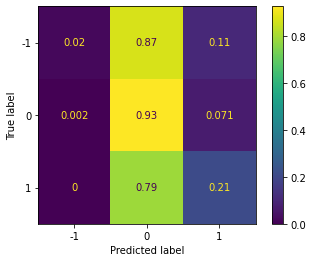

Num estimators : 50, min samples leaf : 1, max features : 0.5, max samples : 0.9
Training accuracy : 0.998, Validation accuracy : 0.717
Validation F1 score : 0.381


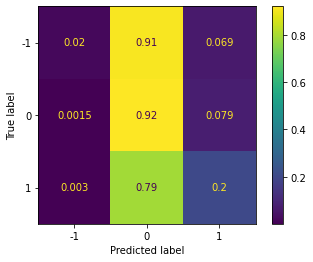

Num estimators : 50, min samples leaf : 1, max features : 0.6, max samples : 0.5
Training accuracy : 0.938, Validation accuracy : 0.727
Validation F1 score : 0.383


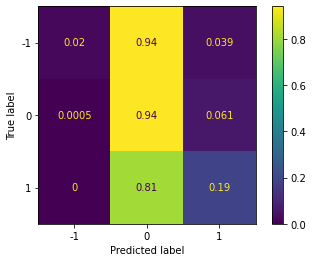

Num estimators : 50, min samples leaf : 1, max features : 0.6, max samples : 0.6
Training accuracy : 0.970, Validation accuracy : 0.723
Validation F1 score : 0.381


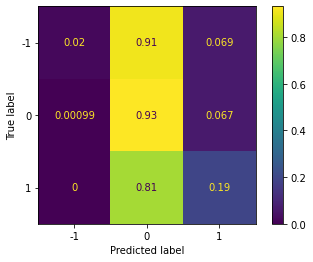

Num estimators : 50, min samples leaf : 1, max features : 0.6, max samples : 0.7
Training accuracy : 0.988, Validation accuracy : 0.723
Validation F1 score : 0.384


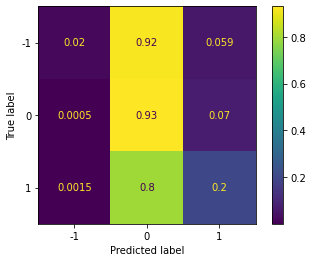

Num estimators : 50, min samples leaf : 1, max features : 0.6, max samples : 0.8
Training accuracy : 0.995, Validation accuracy : 0.718
Validation F1 score : 0.375


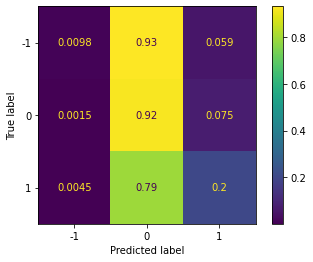

Num estimators : 50, min samples leaf : 1, max features : 0.6, max samples : 0.9
Training accuracy : 0.999, Validation accuracy : 0.722
Validation F1 score : 0.385


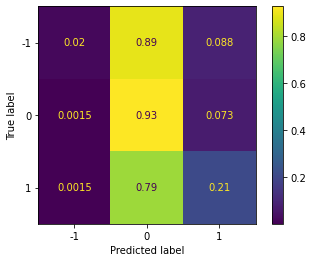

Num estimators : 50, min samples leaf : 1, max features : 0.7, max samples : 0.5
Training accuracy : 0.936, Validation accuracy : 0.725
Validation F1 score : 0.377


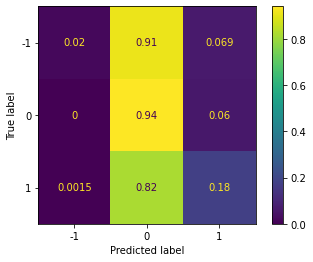

Num estimators : 50, min samples leaf : 1, max features : 0.7, max samples : 0.6
Training accuracy : 0.972, Validation accuracy : 0.716
Validation F1 score : 0.369


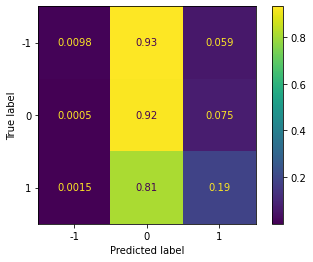

Num estimators : 50, min samples leaf : 1, max features : 0.7, max samples : 0.7
Training accuracy : 0.987, Validation accuracy : 0.720
Validation F1 score : 0.380


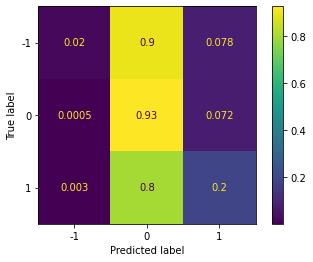

Num estimators : 50, min samples leaf : 1, max features : 0.7, max samples : 0.8
Training accuracy : 0.995, Validation accuracy : 0.719
Validation F1 score : 0.375


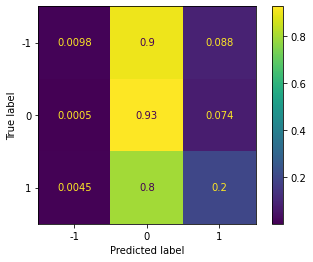

Num estimators : 50, min samples leaf : 1, max features : 0.7, max samples : 0.9
Training accuracy : 0.999, Validation accuracy : 0.717
Validation F1 score : 0.381


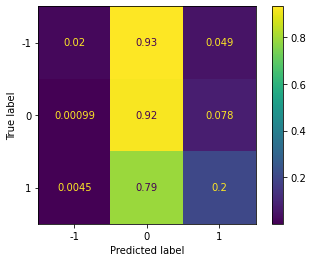

Num estimators : 50, min samples leaf : 1, max features : 0.8, max samples : 0.5
Training accuracy : 0.940, Validation accuracy : 0.717
Validation F1 score : 0.369


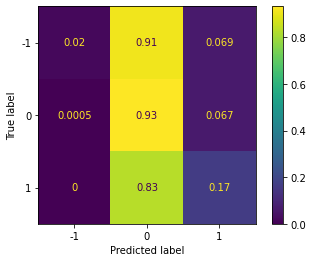

Num estimators : 50, min samples leaf : 1, max features : 0.8, max samples : 0.6
Training accuracy : 0.970, Validation accuracy : 0.719
Validation F1 score : 0.372


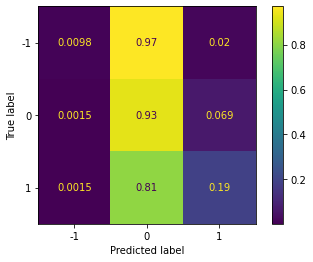

Num estimators : 50, min samples leaf : 1, max features : 0.8, max samples : 0.7
Training accuracy : 0.986, Validation accuracy : 0.721
Validation F1 score : 0.381


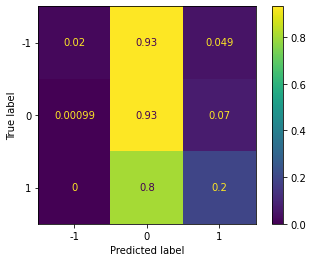

Num estimators : 50, min samples leaf : 1, max features : 0.8, max samples : 0.8
Training accuracy : 0.996, Validation accuracy : 0.722
Validation F1 score : 0.385


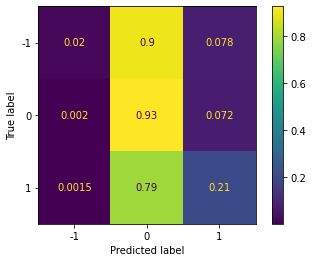

Num estimators : 50, min samples leaf : 1, max features : 0.8, max samples : 0.9
Training accuracy : 0.998, Validation accuracy : 0.714
Validation F1 score : 0.381


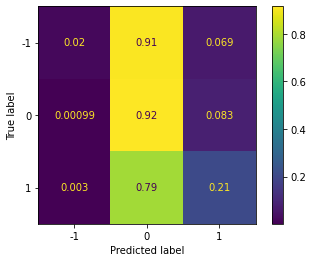

Num estimators : 50, min samples leaf : 1, max features : 0.9, max samples : 0.5
Training accuracy : 0.934, Validation accuracy : 0.724
Validation F1 score : 0.375


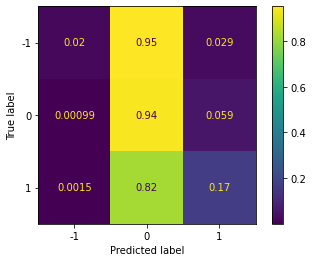

Num estimators : 50, min samples leaf : 1, max features : 0.9, max samples : 0.6
Training accuracy : 0.970, Validation accuracy : 0.724
Validation F1 score : 0.377


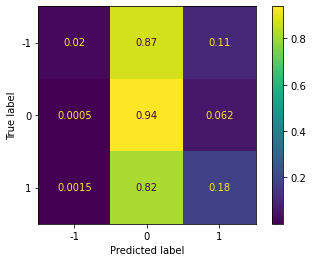

Num estimators : 50, min samples leaf : 1, max features : 0.9, max samples : 0.7
Training accuracy : 0.987, Validation accuracy : 0.716
Validation F1 score : 0.379


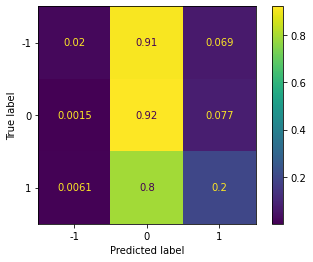

Num estimators : 50, min samples leaf : 1, max features : 0.9, max samples : 0.8
Training accuracy : 0.995, Validation accuracy : 0.713
Validation F1 score : 0.377


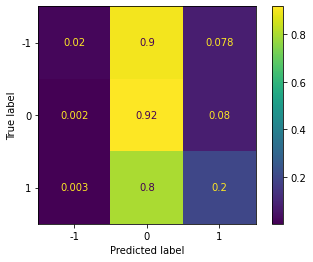

Num estimators : 50, min samples leaf : 1, max features : 0.9, max samples : 0.9
Training accuracy : 0.999, Validation accuracy : 0.716
Validation F1 score : 0.383


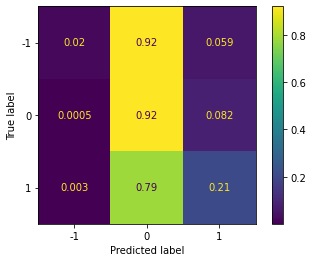

Num estimators : 100, min samples leaf : 1, max features : 0.5, max samples : 0.5
Training accuracy : 0.948, Validation accuracy : 0.731
Validation F1 score : 0.374


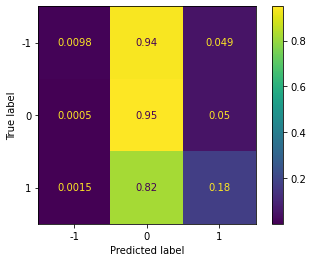

Num estimators : 100, min samples leaf : 1, max features : 0.5, max samples : 0.6
Training accuracy : 0.980, Validation accuracy : 0.727
Validation F1 score : 0.382


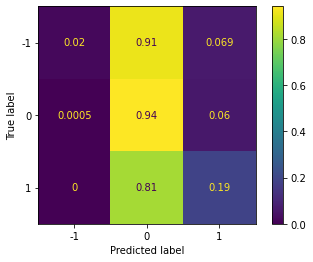

Num estimators : 100, min samples leaf : 1, max features : 0.5, max samples : 0.7
Training accuracy : 0.995, Validation accuracy : 0.724
Validation F1 score : 0.385


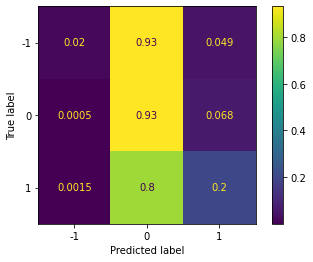

Num estimators : 100, min samples leaf : 1, max features : 0.5, max samples : 0.8
Training accuracy : 0.998, Validation accuracy : 0.724
Validation F1 score : 0.384


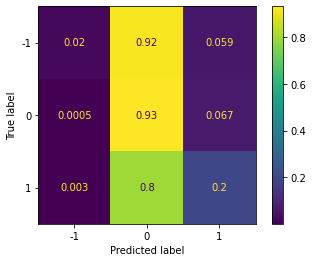

Num estimators : 100, min samples leaf : 1, max features : 0.5, max samples : 0.9
Training accuracy : 0.999, Validation accuracy : 0.723
Validation F1 score : 0.385


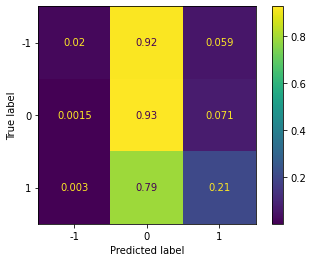

Num estimators : 100, min samples leaf : 1, max features : 0.6, max samples : 0.5
Training accuracy : 0.952, Validation accuracy : 0.731
Validation F1 score : 0.381


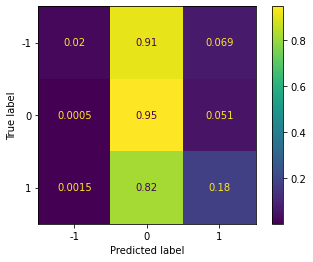

Num estimators : 100, min samples leaf : 1, max features : 0.6, max samples : 0.6
Training accuracy : 0.980, Validation accuracy : 0.727
Validation F1 score : 0.381


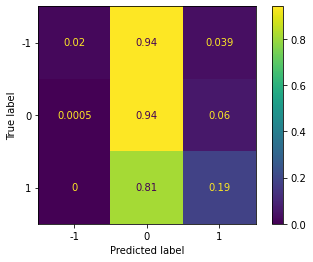

Num estimators : 100, min samples leaf : 1, max features : 0.6, max samples : 0.7
Training accuracy : 0.994, Validation accuracy : 0.726
Validation F1 score : 0.382


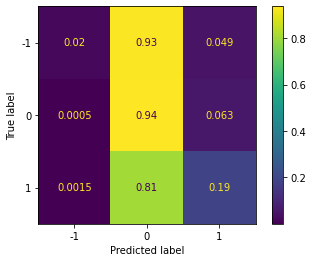

Num estimators : 100, min samples leaf : 1, max features : 0.6, max samples : 0.8
Training accuracy : 0.999, Validation accuracy : 0.722
Validation F1 score : 0.383


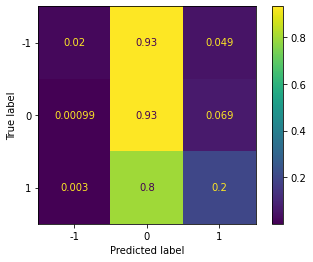

Num estimators : 100, min samples leaf : 1, max features : 0.6, max samples : 0.9
Training accuracy : 1.000, Validation accuracy : 0.721
Validation F1 score : 0.381


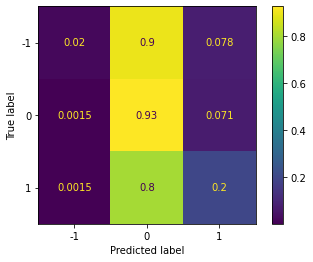

Num estimators : 100, min samples leaf : 1, max features : 0.7, max samples : 0.5
Training accuracy : 0.951, Validation accuracy : 0.726
Validation F1 score : 0.373


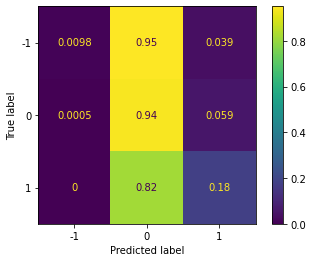

Num estimators : 100, min samples leaf : 1, max features : 0.7, max samples : 0.6
Training accuracy : 0.978, Validation accuracy : 0.724
Validation F1 score : 0.377


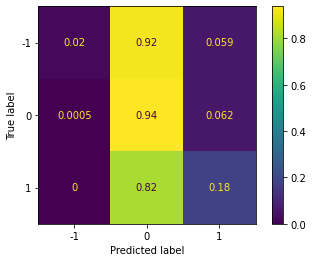

Num estimators : 100, min samples leaf : 1, max features : 0.7, max samples : 0.7
Training accuracy : 0.995, Validation accuracy : 0.730
Validation F1 score : 0.387


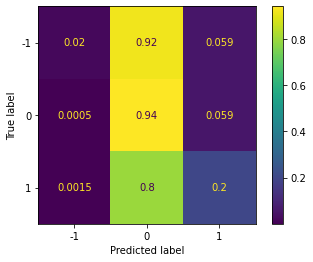

Num estimators : 100, min samples leaf : 1, max features : 0.7, max samples : 0.8
Training accuracy : 0.999, Validation accuracy : 0.720
Validation F1 score : 0.383


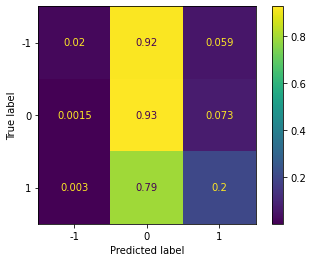

Num estimators : 100, min samples leaf : 1, max features : 0.7, max samples : 0.9
Training accuracy : 1.000, Validation accuracy : 0.724
Validation F1 score : 0.388


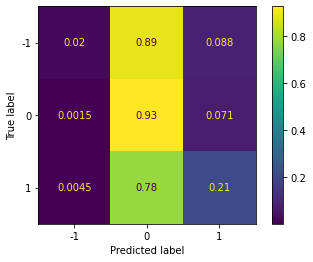

Num estimators : 100, min samples leaf : 1, max features : 0.8, max samples : 0.5
Training accuracy : 0.950, Validation accuracy : 0.724
Validation F1 score : 0.371


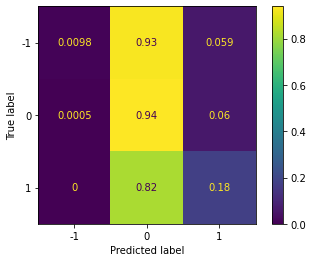

Num estimators : 100, min samples leaf : 1, max features : 0.8, max samples : 0.6
Training accuracy : 0.980, Validation accuracy : 0.723
Validation F1 score : 0.377


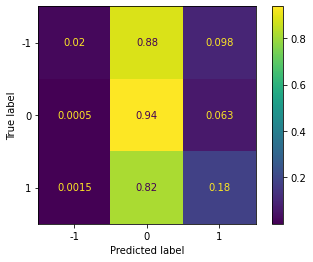

Num estimators : 100, min samples leaf : 1, max features : 0.8, max samples : 0.7
Training accuracy : 0.994, Validation accuracy : 0.724
Validation F1 score : 0.385


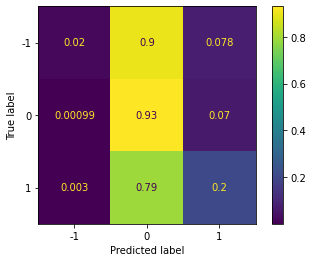

Num estimators : 100, min samples leaf : 1, max features : 0.8, max samples : 0.8
Training accuracy : 0.999, Validation accuracy : 0.720
Validation F1 score : 0.382


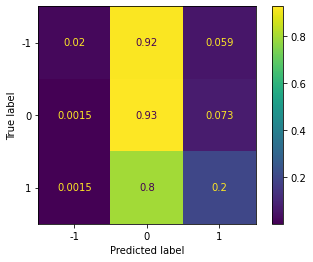

Num estimators : 100, min samples leaf : 1, max features : 0.8, max samples : 0.9
Training accuracy : 0.999, Validation accuracy : 0.721
Validation F1 score : 0.383


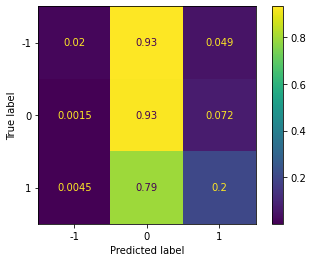

Num estimators : 100, min samples leaf : 1, max features : 0.9, max samples : 0.5
Training accuracy : 0.951, Validation accuracy : 0.726
Validation F1 score : 0.378


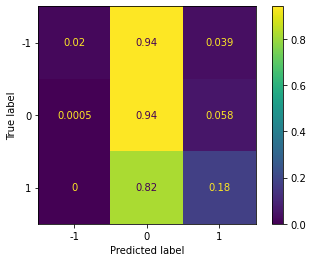

Num estimators : 100, min samples leaf : 1, max features : 0.9, max samples : 0.6
Training accuracy : 0.980, Validation accuracy : 0.725
Validation F1 score : 0.382


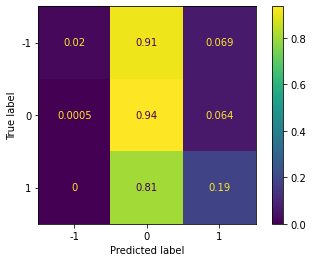

Num estimators : 100, min samples leaf : 1, max features : 0.9, max samples : 0.7
Training accuracy : 0.994, Validation accuracy : 0.727
Validation F1 score : 0.382


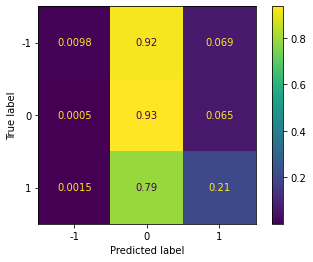

Num estimators : 100, min samples leaf : 1, max features : 0.9, max samples : 0.8
Training accuracy : 0.999, Validation accuracy : 0.724
Validation F1 score : 0.384


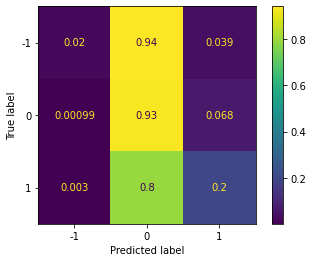

Num estimators : 100, min samples leaf : 1, max features : 0.9, max samples : 0.9
Training accuracy : 1.000, Validation accuracy : 0.722
Validation F1 score : 0.383


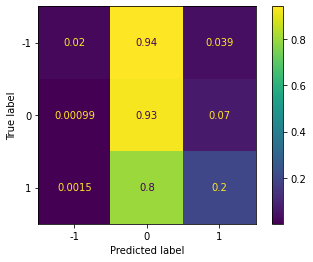

Num estimators : 150, min samples leaf : 1, max features : 0.5, max samples : 0.5
Training accuracy : 0.955, Validation accuracy : 0.729
Validation F1 score : 0.366


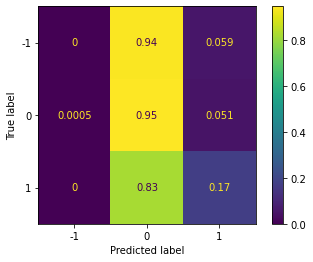

Num estimators : 150, min samples leaf : 1, max features : 0.5, max samples : 0.6
Training accuracy : 0.982, Validation accuracy : 0.729
Validation F1 score : 0.384


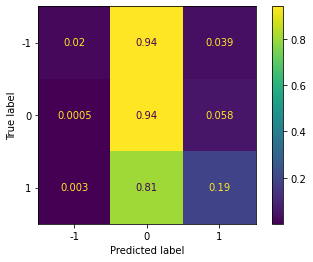

Num estimators : 150, min samples leaf : 1, max features : 0.5, max samples : 0.7
Training accuracy : 0.997, Validation accuracy : 0.728
Validation F1 score : 0.384


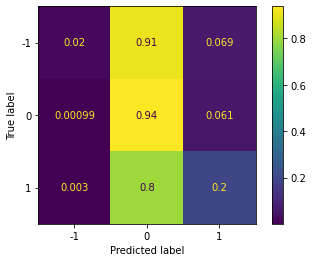

Num estimators : 150, min samples leaf : 1, max features : 0.5, max samples : 0.8
Training accuracy : 1.000, Validation accuracy : 0.724
Validation F1 score : 0.384


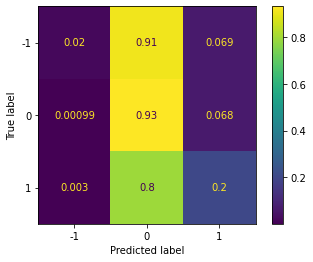

Num estimators : 150, min samples leaf : 1, max features : 0.5, max samples : 0.9
Training accuracy : 1.000, Validation accuracy : 0.723
Validation F1 score : 0.384


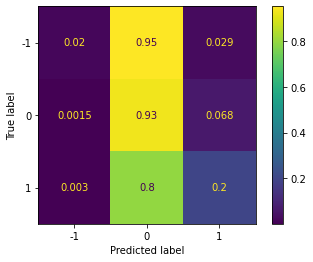

Num estimators : 150, min samples leaf : 1, max features : 0.6, max samples : 0.5
Training accuracy : 0.957, Validation accuracy : 0.726
Validation F1 score : 0.370


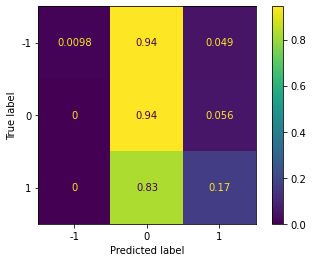

Num estimators : 150, min samples leaf : 1, max features : 0.6, max samples : 0.6
Training accuracy : 0.983, Validation accuracy : 0.725
Validation F1 score : 0.380


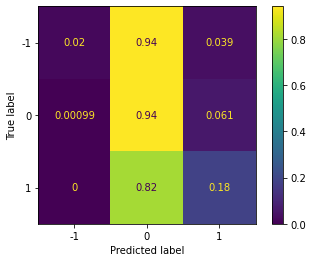

Num estimators : 150, min samples leaf : 1, max features : 0.6, max samples : 0.7
Training accuracy : 0.997, Validation accuracy : 0.724
Validation F1 score : 0.381


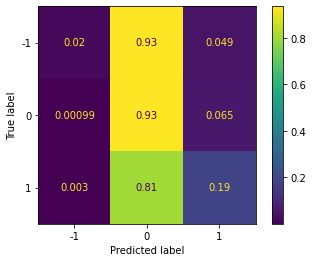

Num estimators : 150, min samples leaf : 1, max features : 0.6, max samples : 0.8
Training accuracy : 0.999, Validation accuracy : 0.728
Validation F1 score : 0.390


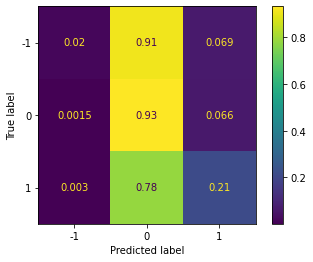

Num estimators : 150, min samples leaf : 1, max features : 0.6, max samples : 0.9
Training accuracy : 1.000, Validation accuracy : 0.723
Validation F1 score : 0.384


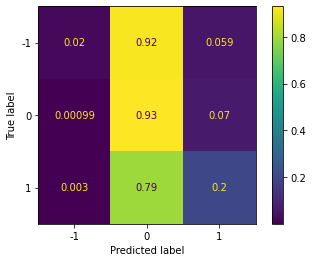

Num estimators : 150, min samples leaf : 1, max features : 0.7, max samples : 0.5
Training accuracy : 0.956, Validation accuracy : 0.727
Validation F1 score : 0.371


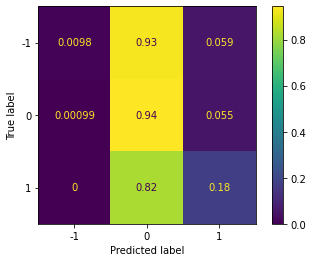

Num estimators : 150, min samples leaf : 1, max features : 0.7, max samples : 0.6
Training accuracy : 0.985, Validation accuracy : 0.729
Validation F1 score : 0.381


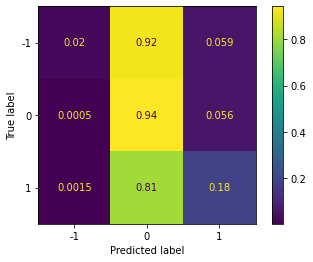

Num estimators : 150, min samples leaf : 1, max features : 0.7, max samples : 0.7
Training accuracy : 0.996, Validation accuracy : 0.727
Validation F1 score : 0.386


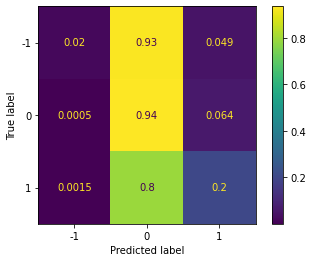

Num estimators : 150, min samples leaf : 1, max features : 0.7, max samples : 0.8


KeyboardInterrupt: ignored

In [37]:
F1_score = []
params = {}
for min_samples_leaf in tqdm(np.linspace(1, 25, 13, dtype=np.int32)):
    for n_estimators in np.linspace(50, 200, 4, dtype=np.int32):
        for max_features in np.linspace(0.5, 0.9, 5):
            for max_samples in np.linspace(0.5, 0.9, 5):
                print('===================================================================================')
                print('Num estimators : {0}, min samples leaf : {1}, max features : {2}, max samples : {3}'.
                    format(n_estimators, min_samples_leaf, max_features, max_samples))
                model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=n_estimators,
                                                                               min_samples_leaf=min_samples_leaf,
                                                                               max_features=max_features,
                                                                               max_samples=max_samples))
                model.fit(X_train_pca, y_train)

                y_train_pred = model.predict(X_train_pca)
                y_val_pred = model.predict(X_val_pca)

                tacc = accuracy_score(y_train, y_train_pred)
                vacc = accuracy_score(y_val, y_val_pred)
                val_f1 = f1_score(y_val, y_val_pred, average='macro')
                print('Training accuracy : {0:.3f}, Validation accuracy : {1:.3f}'.format(tacc, vacc))
                print("Validation F1 score : {0:.3f}".format(val_f1))

                conf_matrix = confusion_matrix(y_val, y_val_pred, normalize='true')
                disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
                disp.plot()
                plt.show()

                F1_score.append(val_f1)
                params[str(val_f1)] = [criterion, min_samples_leaf]

In [ ]:
params[str(max(F1_score))], max(F1_score)